# 数据探索部分

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
path=r'C:/Users/LCP/Desktop/统计学习实现/练习/data/保险欺诈/'

pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

In [618]:
def data_load():
    data=pd.read_csv(path+'train.csv')
    feature=data.columns.tolist()
    return data,feature

def test_load():
    data=pd.read_csv(path+'test.csv')
    return data

DF,feature=data_load()

DF.drop(columns='policy_id',inplace=True)
feature=feature.remove('policy_id')

In [619]:
DF.head()

,age,customer_months,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud
0,37,189,2013-08-21,C,500/1000,1000,1465.71,5000000,455456,FEMALE,Masters,protective-serv,reading,not-in-family,62203,0,2014-12-22,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,S5,Riverwood,21,1,?,0,3,?,54930,6029,5752,44452,Nissan,Maxima,2000,0
1,44,234,1998-01-04,B,250/500,500,821.24,0,591805,MALE,JD,craft-repair,polo,other-relative,31606,0,2015-02-18,Multi-vehicle Collision,Side Collision,Minor Damage,Other,S5,Springfield,4,3,?,2,1,YES,50680,5376,10156,37347,Honda,Civic,1996,0
2,33,23,1996-02-06,B,500/1000,1000,1844.00,0,442490,FEMALE,High School,machine-op-inspct,skydiving,wife,0,-43166,2015-01-18,Single Vehicle Collision,Side Collision,Total Loss,Police,S3,Northbend,0,1,?,2,1,NO,47829,4460,9247,33644,Jeep,Wrangler,2002,0
3,42,210,2008-11-14,A,500/1000,500,1867.29,0,439408,MALE,JD,transport-moving,video-games,own-child,0,-49440,2015-02-02,Multi-vehicle Collision,Front Collision,Major Damage,Fire,S3,Northbend,20,3,YES,2,2,YES,68862,11043,5955,53548,Suburu,Legacy,2003,1
4,29,81,2002-01-08,A,100/300,1000,816.25,0,640575,FEMALE,MD,craft-repair,video-games,own-child,75296,-73689,2015-02-09,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,S2,Northbend,9,3,YES,2,1,YES,59726,5617,10301,41550,Ford,F150,2004,0


## 数据概况

In [620]:
object_feature=DF.select_dtypes(include='object').columns.tolist()
num_feature=DF.select_dtypes(exclude='object').columns.tolist()

In [621]:
DF[object_feature].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,2013-08-21,C,500/1000,FEMALE,Masters,protective-serv,reading,not-in-family,2014-12-22,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,S5,Riverwood,?,?,Nissan,Maxima
1,1998-01-04,B,250/500,MALE,JD,craft-repair,polo,other-relative,2015-02-18,Multi-vehicle Collision,Side Collision,Minor Damage,Other,S5,Springfield,?,YES,Honda,Civic
2,1996-02-06,B,500/1000,FEMALE,High School,machine-op-inspct,skydiving,wife,2015-01-18,Single Vehicle Collision,Side Collision,Total Loss,Police,S3,Northbend,?,NO,Jeep,Wrangler
3,2008-11-14,A,500/1000,MALE,JD,transport-moving,video-games,own-child,2015-02-02,Multi-vehicle Collision,Front Collision,Major Damage,Fire,S3,Northbend,YES,YES,Suburu,Legacy
4,2002-01-08,A,100/300,FEMALE,MD,craft-repair,video-games,own-child,2015-02-09,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,S2,Northbend,YES,YES,Ford,F150


In [622]:
DF[num_feature].head()

,age,customer_months,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud
0,37,189,1000,1465.71,5000000,455456,62203,0,21,1,0,3,54930,6029,5752,44452,2000,0
1,44,234,500,821.24,0,591805,31606,0,4,3,2,1,50680,5376,10156,37347,1996,0
2,33,23,1000,1844.00,0,442490,0,-43166,0,1,2,1,47829,4460,9247,33644,2002,0
3,42,210,500,1867.29,0,439408,0,-49440,20,3,2,2,68862,11043,5955,53548,2003,1
4,29,81,1000,816.25,0,640575,75296,-73689,9,3,2,1,59726,5617,10301,41550,2004,0


## 定量特征分析

In [623]:
#在定量特征中删去标签项
num_feature.remove('fraud')
#insured_zip特征无意义删去
DF.drop(columns='insured_zip',inplace=True)
num_feature.remove('insured_zip')
#对auto_year进行处理,转化为汽车使用的年数
DF['auto_year']=2023-DF['auto_year']
DF.shape

(700, 36)

In [624]:
#加载测试数据，并作处理
Test=test_load()
Test['auto_year']=2023-Test['auto_year']
Test.drop(columns='insured_zip',inplace=True)
Test.drop(columns='policy_id',inplace=True)
Test.shape

(300, 35)

In [625]:
#查看umbrella_limit的分布，若不均匀则直接删除
DF['umbrella_limit'].value_counts()
DF.drop(columns='umbrella_limit',inplace=True)
Test.drop(columns='umbrella_limit',inplace=True)
num_feature.remove('umbrella_limit')

In [626]:
#区分定量特征中的连续特征和离散特征
contious_fea=[]
dispersd_fea=[]
for item in num_feature:
    if DF[item].nunique()<=10:
        dispersd_fea.append(item)
    else:
        contious_fea.append(item)

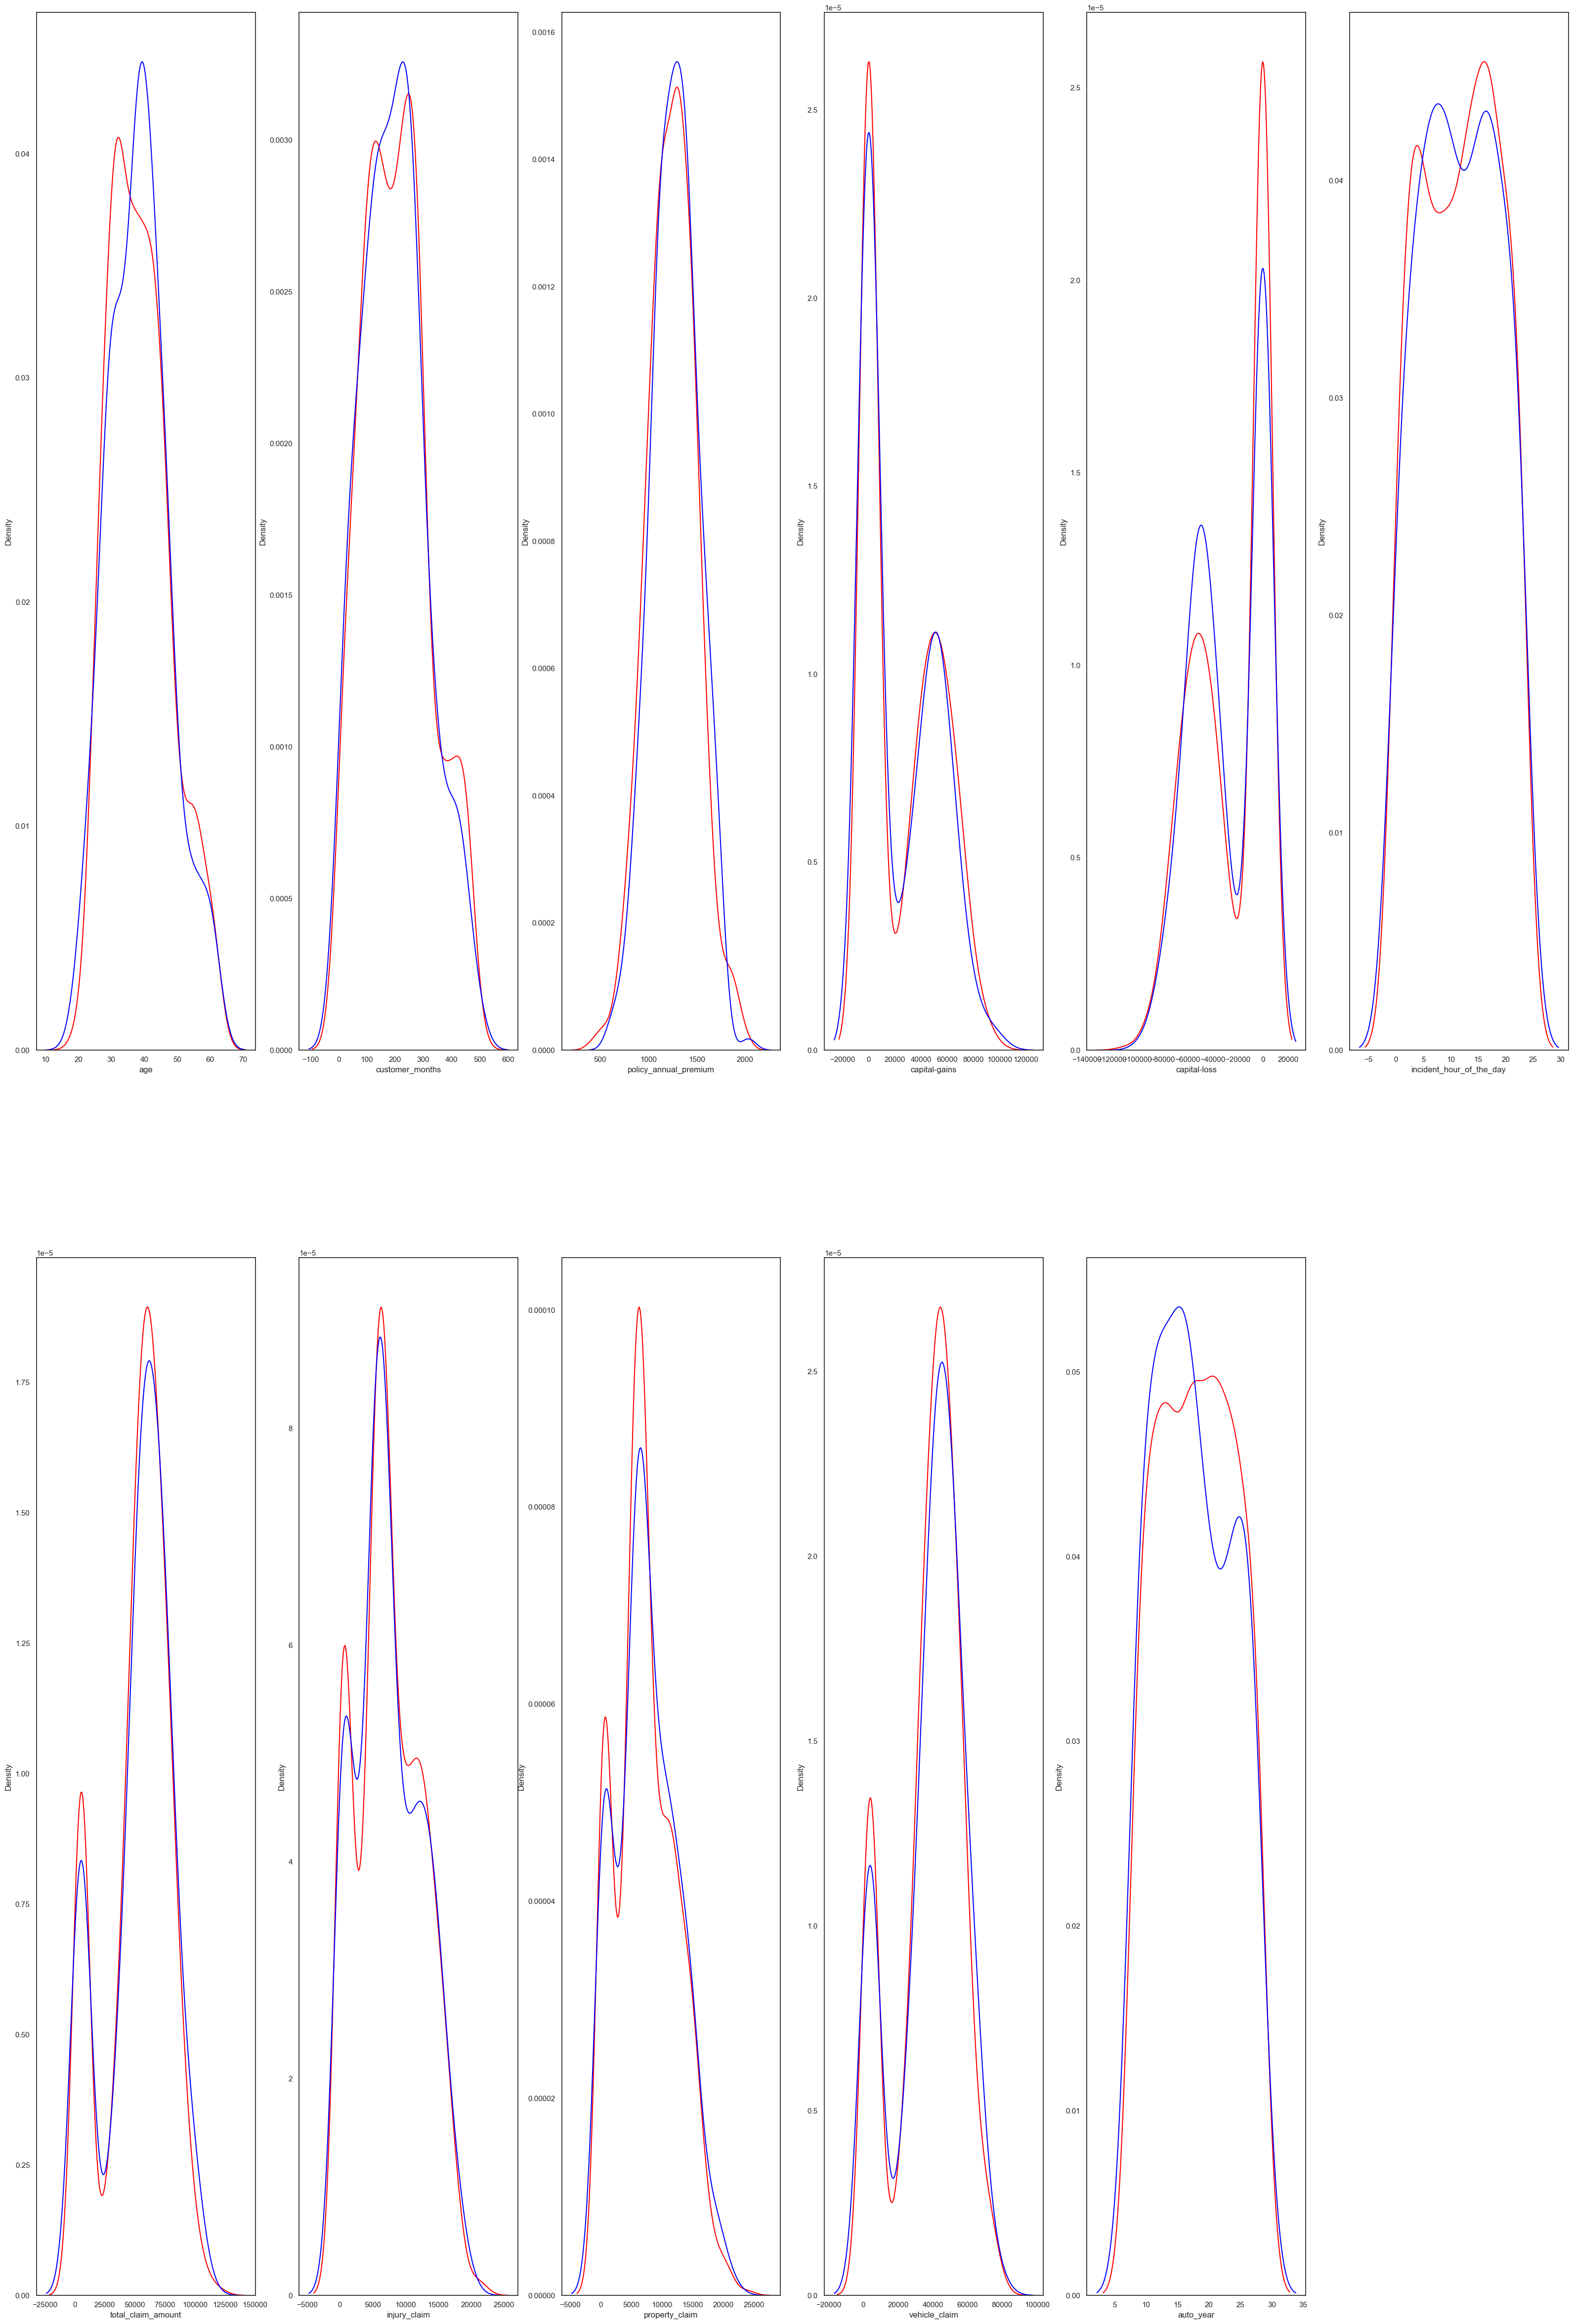

In [627]:
#观察测试集与训练集在连续特征上的分布
fig=plt.figure(figsize=(40,60))
i=1
for item in contious_fea:
    ax0=fig.add_subplot(2,6,i)
    sns.kdeplot(DF[item],color='red',ax=ax0)
    sns.kdeplot(Test[item],color='blue',ax=ax0)
    i=i+1
                                                                                            

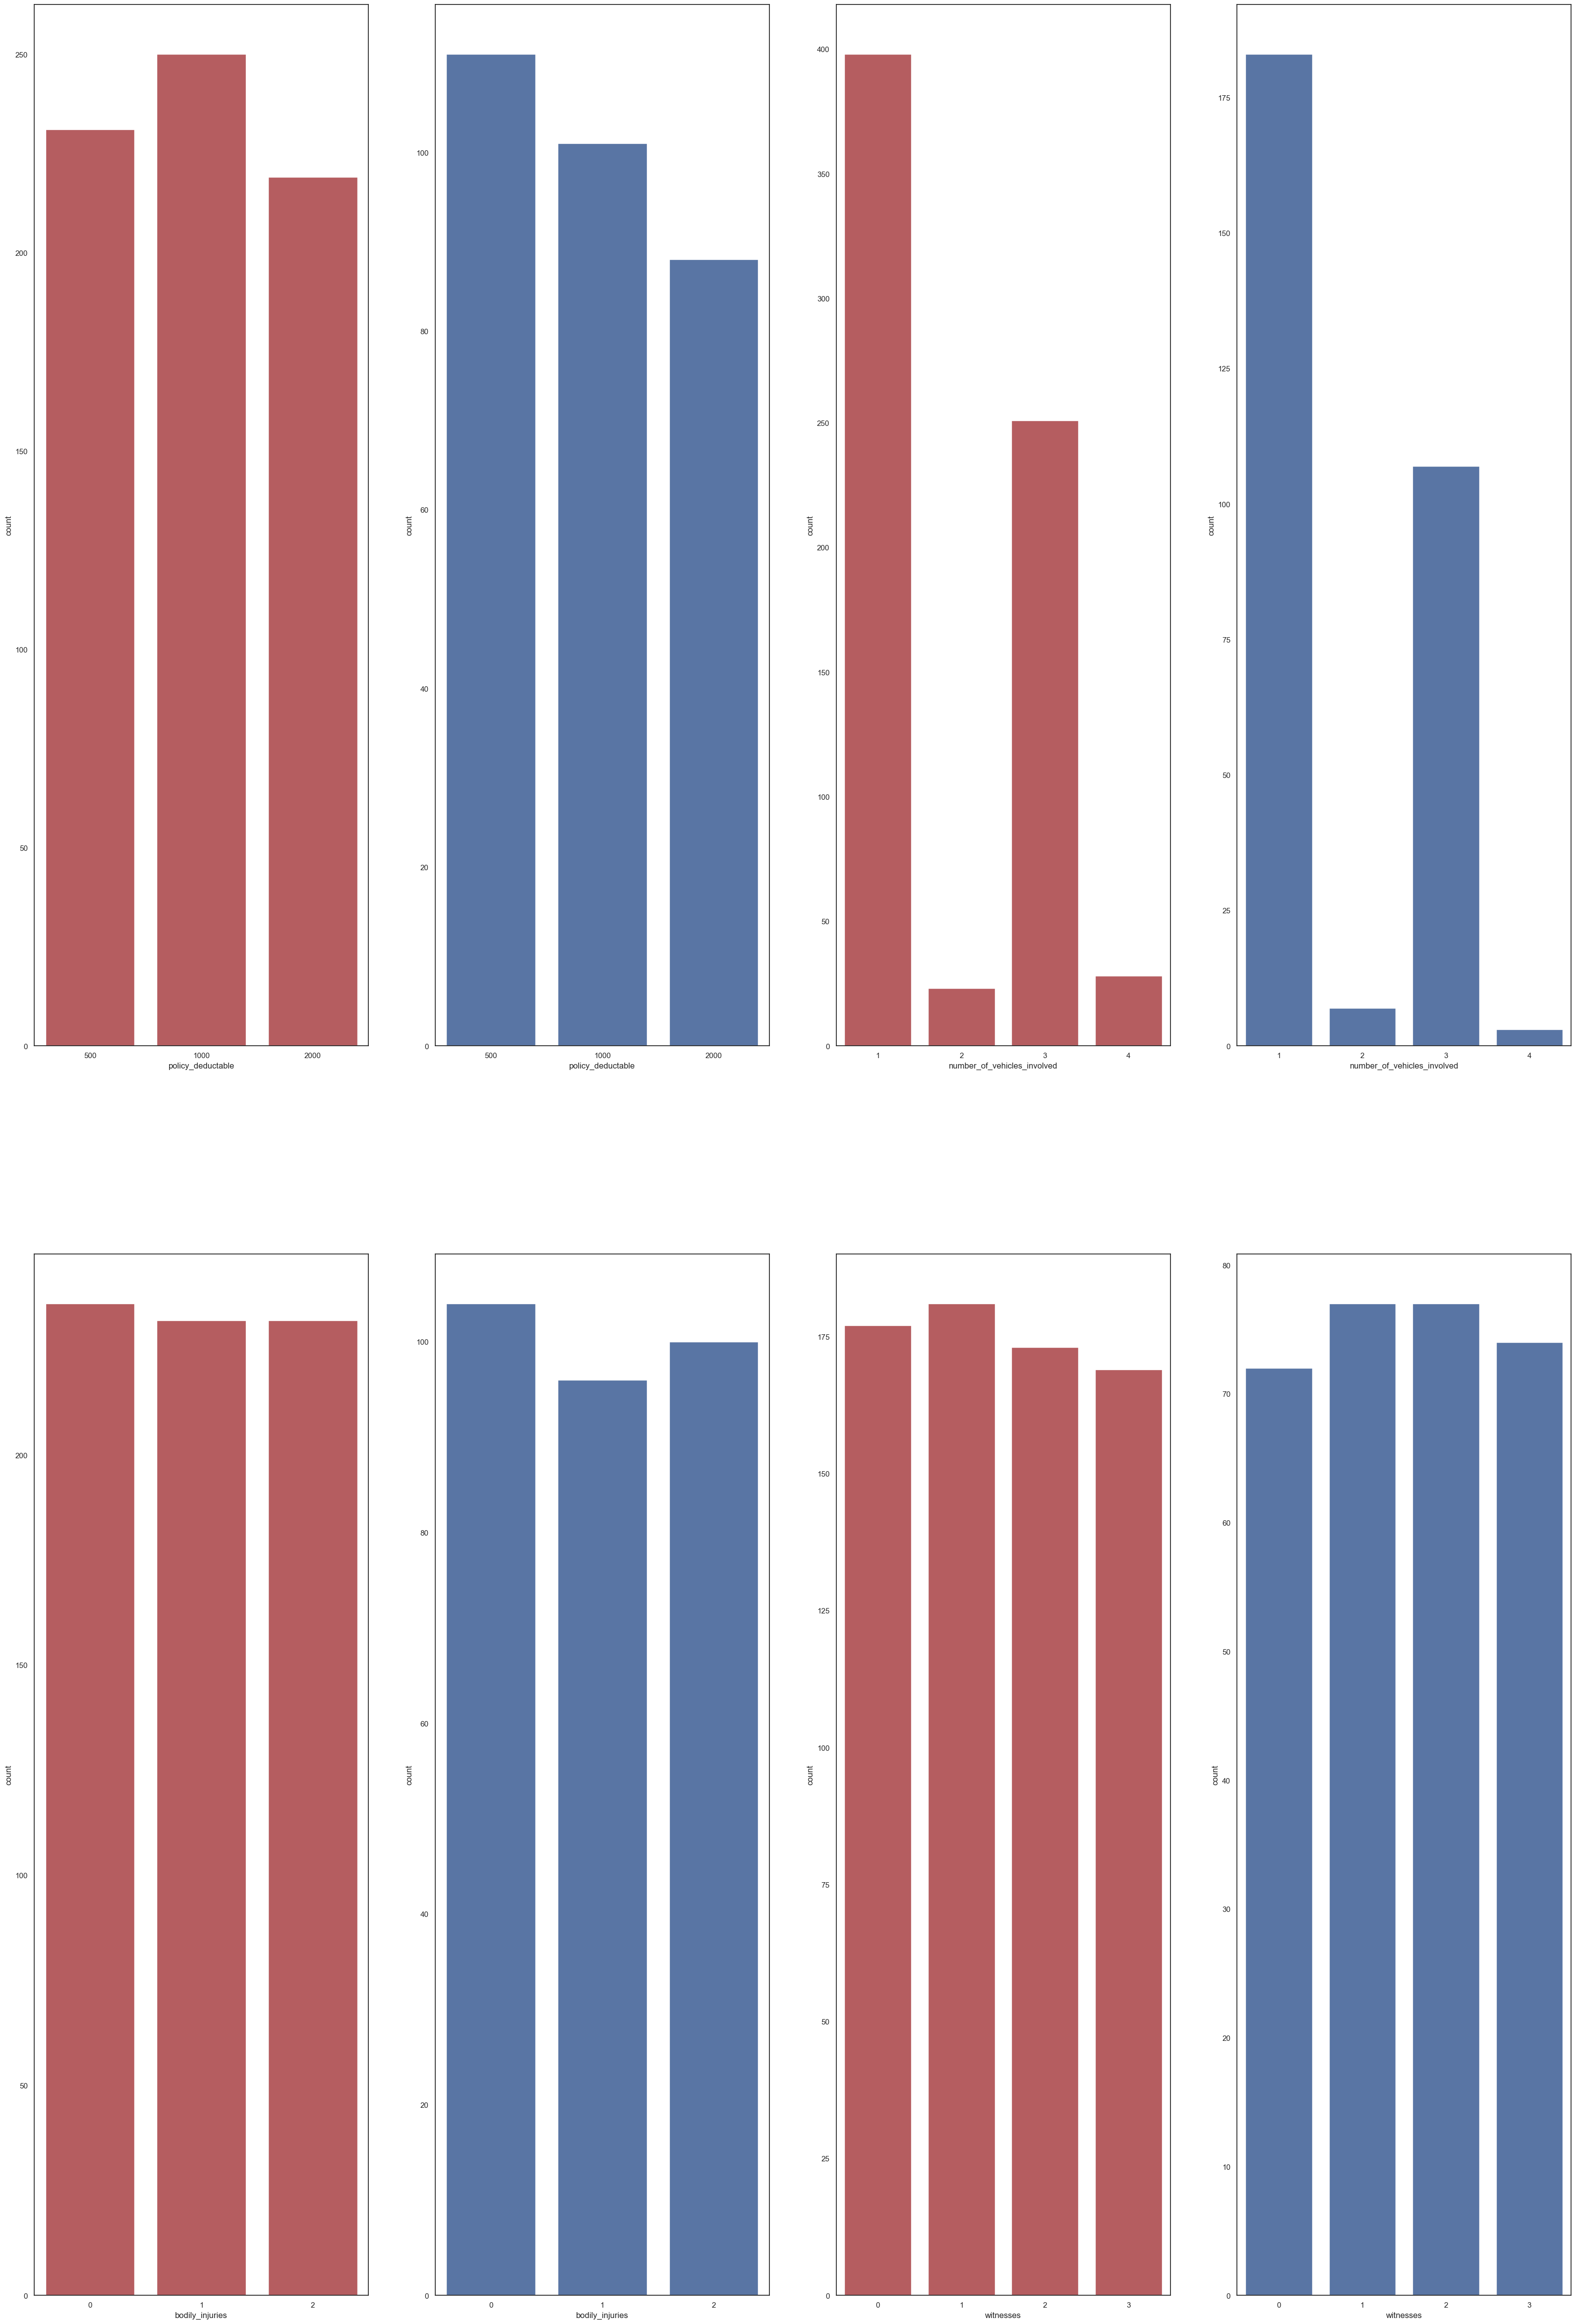

In [628]:
#观察测试集与训练集在离散特征上的分布
fig=plt.figure(figsize=(40,60))
i=1
for item in dispersd_fea:
    ax0=fig.add_subplot(2,4,i)
    sns.countplot(x=item,data=DF,color='r',ax=ax0)
    i+=1

    ax1=fig.add_subplot(2,4,i)
    sns.countplot(x=item,data=Test,color='b',ax=ax1)
    i+=1
    


## 定性特征分析

In [629]:
DF[object_feature].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,2013-08-21,C,500/1000,FEMALE,Masters,protective-serv,reading,not-in-family,2014-12-22,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,S5,Riverwood,?,?,Nissan,Maxima
1,1998-01-04,B,250/500,MALE,JD,craft-repair,polo,other-relative,2015-02-18,Multi-vehicle Collision,Side Collision,Minor Damage,Other,S5,Springfield,?,YES,Honda,Civic
2,1996-02-06,B,500/1000,FEMALE,High School,machine-op-inspct,skydiving,wife,2015-01-18,Single Vehicle Collision,Side Collision,Total Loss,Police,S3,Northbend,?,NO,Jeep,Wrangler
3,2008-11-14,A,500/1000,MALE,JD,transport-moving,video-games,own-child,2015-02-02,Multi-vehicle Collision,Front Collision,Major Damage,Fire,S3,Northbend,YES,YES,Suburu,Legacy
4,2002-01-08,A,100/300,FEMALE,MD,craft-repair,video-games,own-child,2015-02-09,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,S2,Northbend,YES,YES,Ford,F150


In [630]:
#观察定性特征的数据排布，观察是否有不均衡的特征
for item in object_feature:
    print(DF[item].value_counts())

2002-07-24    2
2003-07-22    2
1992-01-04    2
2013-05-01    2
1990-03-11    2
             ..
1999-10-22    1
1990-08-05    1
2007-11-08    1
2003-03-28    1
1996-08-15    1
Name: policy_bind_date, Length: 674, dtype: int64
A    249
B    237
C    214
Name: policy_state, dtype: int64
100/300     259
250/500     248
500/1000    193
Name: policy_csl, dtype: int64
FEMALE    370
MALE      330
Name: insured_sex, dtype: int64
JD             120
High School    105
Associate      105
Masters         99
MD              93
College         91
PhD             87
Name: insured_education_level, dtype: int64
machine-op-inspct    66
exec-managerial      57
craft-repair         54
sales                54
prof-specialty       53
priv-house-serv      52
armed-forces         51
transport-moving     50
tech-support         50
other-service        47
adm-clerical         45
farming-fishing      42
protective-serv      41
handlers-cleaners    38
Name: insured_occupation, dtype: int64
exercise          45
bu

除时间数据外，其余特征的分布都较为均衡
时间数据可以通过特征工程部分进行转化

# 特征工程

## 定性特征的处理

In [631]:
DF[object_feature].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model
0,2013-08-21,C,500/1000,FEMALE,Masters,protective-serv,reading,not-in-family,2014-12-22,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,S5,Riverwood,?,?,Nissan,Maxima
1,1998-01-04,B,250/500,MALE,JD,craft-repair,polo,other-relative,2015-02-18,Multi-vehicle Collision,Side Collision,Minor Damage,Other,S5,Springfield,?,YES,Honda,Civic
2,1996-02-06,B,500/1000,FEMALE,High School,machine-op-inspct,skydiving,wife,2015-01-18,Single Vehicle Collision,Side Collision,Total Loss,Police,S3,Northbend,?,NO,Jeep,Wrangler
3,2008-11-14,A,500/1000,MALE,JD,transport-moving,video-games,own-child,2015-02-02,Multi-vehicle Collision,Front Collision,Major Damage,Fire,S3,Northbend,YES,YES,Suburu,Legacy
4,2002-01-08,A,100/300,FEMALE,MD,craft-repair,video-games,own-child,2015-02-09,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,S2,Northbend,YES,YES,Ford,F150


In [632]:
#时间数据处理，从上保日期和被保日期之间构建新特征
import datetime
DF['policy_bind_date']=pd.to_datetime(DF['policy_bind_date'],format='%Y-%m-%d')
DF['incident_date']=pd.to_datetime(DF['incident_date'],format='%Y-%m-%d')
DF['insuretime']=(DF['incident_date']-DF['policy_bind_date']).dt.days
DF.drop(columns=['policy_bind_date','incident_date'],inplace=True)

Test['policy_bind_date']=pd.to_datetime(Test['policy_bind_date'],format='%Y-%m-%d')
Test['incident_date']=pd.to_datetime(Test['incident_date'],format='%Y-%m-%d')
Test['insuretime']=(Test['incident_date']-Test['policy_bind_date']).dt.days
Test.drop(columns=['policy_bind_date','incident_date'],inplace=True)
object_feature.remove('incident_date')
object_feature.remove('policy_bind_date')
contious_fea.append('insuretime')

In [633]:
#其余定性特征需要进行编码处理
#类别数少的可以进行labelEncode或onehotcode
#类别数较多的可以进行meanENcode处理

temp=object_feature
#首先将定性特征分类，确定不同特征需要的编码的方法
onehot_fea=['insured_sex']#onehot编码的列表，适用于低基数无序数据
mean_fea=['insured_occupation','insured_hobbies','auto_make','auto_model']#均值编码列表，适用于高基数无序数据

#其余特征采用标签编码
label_fea=[]
for item in object_feature:
    if item in onehot_fea or item in mean_fea:
        continue
    label_fea.append(item)
DF[object_feature].nunique()

policy_state                3
policy_csl                  3
insured_sex                 2
insured_education_level     7
insured_occupation         14
insured_hobbies            20
insured_relationship        6
incident_type               4
collision_type              4
incident_severity           4
authorities_contacted       5
incident_state              7
incident_city               7
property_damage             3
police_report_available     3
auto_make                  14
auto_model                 39
dtype: int64

In [634]:
#独热编码处理
DF=pd.get_dummies(DF,columns=onehot_fea,drop_first=True)
Test=pd.get_dummies(Test,columns=onehot_fea,drop_first=True)

In [635]:
#标签编码处理
from sklearn.base import TransformerMixin
class df_label_code(TransformerMixin):
    def __init__(self,fea) -> None:
        from sklearn.preprocessing import LabelEncoder
        super().__init__()
        self.fea=fea
        self.coder={}
        for item in fea:
            self.coder[item]=LabelEncoder()
    
    def fit(self,DF):
        for item in self.fea:
            self.coder[item].fit(DF[item])
        return self
    
    def transform(self,DF):
        for item in self.fea:
            DF[item]=self.coder[item].transform(DF[item])
        return DF

label_coder=df_label_code(label_fea)
label_coder.fit(DF)
DF=label_coder.transform(DF)
Test=label_coder.transform(Test)

In [636]:
class MeanEncoder:
    def __init__(self, categorical_features, n_splits=5, target_type='classification', prior_weight_func=None):
        """
        :param categorical_features: list of str, the name of the categorical columns to encode
        :param n_splits: the number of splits used in mean encoding
        :param target_type: str, 'regression' or 'classification'
        :param prior_weight_func:
        a function that takes in the number of observations, and outputs prior weight when a dict is passed, the default exponential decay function will be used:
        k: the number of observations needed for the posterior to be weighted equally as the prior
        f: larger f --> smaller slope
        """
        self.categorical_features = categorical_features
        self.n_splits = n_splits
        self.learned_stats = {}
        if target_type == 'classification':
            self.target_type = target_type
            self.target_values = []
        else:
            self.target_type = 'regression'
            self.target_values = None
        if isinstance(prior_weight_func, dict):
            self.prior_weight_func = eval('lambda x: 1 / (1 + np.exp((x - k) / f))', dict(prior_weight_func, np=np))
        elif callable(prior_weight_func):
            self.prior_weight_func = prior_weight_func
        else:
            self.prior_weight_func = lambda x: 1 / (1 + np.exp((x - 2) / 1))

    @staticmethod
    def mean_encode_subroutine(X_train, y_train, X_test, variable, target, prior_weight_func):
        X_train = X_train[[variable]].copy()
        X_test = X_test[[variable]].copy()
        if target is not None:
            nf_name = '{}_pred_{}'.format(variable, target)
            X_train['pred_temp'] = (y_train == target).astype(int) #classification
        else:
            nf_name = '{}_pred'.format(variable)
            X_train['pred_temp'] = y_train  #regression
        prior = X_train['pred_temp'].mean()
        col_avg_y = X_train.groupby(by=variable, axis=0)['pred_temp'].agg({('mean','mean'),('beta','size')})
        col_avg_y['beta'] = prior_weight_func(col_avg_y['beta'])
        col_avg_y[nf_name] = col_avg_y['beta'] * prior + (1 - col_avg_y['beta']) * col_avg_y['mean']
        col_avg_y.drop(['beta', 'mean'], axis=1, inplace=True)
        nf_train = X_train.join(col_avg_y, on=variable)[nf_name].values
        nf_test = X_test.join(col_avg_y, on=variable).fillna(prior, inplace=False)[nf_name].values
        return nf_train, nf_test, prior, col_avg_y

    def fit_transform(self, X, y):
        from sklearn.model_selection import StratifiedKFold
        from sklearn.model_selection import KFold
        from itertools import product
        """
        :param X: pandas DataFrame, n_samples * n_features
        :param y: pandas Series or numpy array, n_samples
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()
        if self.target_type == 'classification':
            skf = StratifiedKFold(self.n_splits)
        else:
            skf = KFold(self.n_splits)
        if self.target_type == 'classification':
            self.target_values = sorted(set(y))
            self.learned_stats = {'{}_pred_{}'.format(variable, target): [] for variable, target in product(self.categorical_features, self.target_values)}
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(X_new.iloc[large_ind],y.iloc[large_ind],X_new.iloc[small_ind],variable, target, self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        else:
            self.learned_stats = {'{}_pred'.format(variable): [] for variable in self.categorical_features}
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, None, self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        return X_new

    def transform(self, X):
        from itertools import product
        """
        :param X: pandas DataFrame, n_samples * n_features
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()
        if self.target_type == 'classification':
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[nf_name]
                X_new[nf_name] /= self.n_splits
        else:
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[nf_name]
                X_new[nf_name] /= self.n_splits
        return X_new

mean_coder=MeanEncoder(categorical_features=mean_fea,target_type='classification')
DF=mean_coder.fit_transform(DF,DF['fraud'])
Test=mean_coder.transform(Test)

In [637]:
DF.drop(columns=mean_fea,inplace=True)
Test.drop(columns=mean_fea,inplace=True)

In [638]:
DF.head()

,age,customer_months,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud,insuretime,insured_sex_MALE,insured_occupation_pred_0,insured_occupation_pred_1,insured_hobbies_pred_0,insured_hobbies_pred_1,auto_make_pred_0,auto_make_pred_1,auto_model_pred_0,auto_model_pred_1
0,37,189,2,2,1000,1465.71,5,1,62203,0,2,3,2,0,4,5,21,1,0,0,3,0,54930,6029,5752,44452,23,0,488,0,0.687500,0.312500,0.709677,0.290323,0.760000,0.240000,0.687500,0.312500
1,44,234,1,1,500,821.24,3,2,31606,0,0,3,1,3,4,6,4,3,0,2,1,2,50680,5376,10156,37347,27,0,6254,1,0.743590,0.256410,0.718750,0.281250,0.687500,0.312500,0.416681,0.583319
2,33,23,1,2,1000,1844.00,2,5,0,-43166,2,3,2,4,2,3,0,1,0,2,1,1,47829,4460,9247,33644,21,0,6921,0,0.767857,0.232143,0.761905,0.238095,0.864865,0.135135,0.923077,0.076923
3,42,210,0,2,500,1867.29,3,3,0,-49440,0,1,0,1,2,3,20,3,2,2,2,2,68862,11043,5955,53548,20,1,2271,1,0.714286,0.285714,0.736842,0.263158,0.733333,0.266667,0.833333,0.166667
4,29,81,0,0,1000,816.25,4,3,75296,-73689,0,2,2,1,1,3,9,3,2,2,1,2,59726,5617,10301,41550,19,0,4780,0,0.743590,0.256410,0.736842,0.263158,0.736842,0.263158,0.692309,0.307691


## 定量特征的处理

In [639]:
#连续特征的归一化
#自定义标准化处理器
from sklearn.base import TransformerMixin
class DF_Transformer(TransformerMixin):
    def __init__(self,fea) -> None:
        from sklearn.preprocessing import MinMaxScaler
        super().__init__()
        self.fea=fea
        self.transfers={}
        for item in self.fea:
            self.transfers[item]=MinMaxScaler()
        
    def fit(self,DataFrame):
        for item in self.fea:
            self.transfers[item].fit(np.array(DataFrame[item]).reshape(-1,1))
        return self
    
    def transform(self,DataFrame):
        for item in self.fea:
            DataFrame[item]=self.transfers[item].transform(np.array(DataFrame[item]).reshape(-1,1))
        return DataFrame

test_trans=DF_Transformer(contious_fea)
test_trans.fit(DF)
DF=test_trans.fit_transform(DF)
Test=test_trans.transform(Test)
  

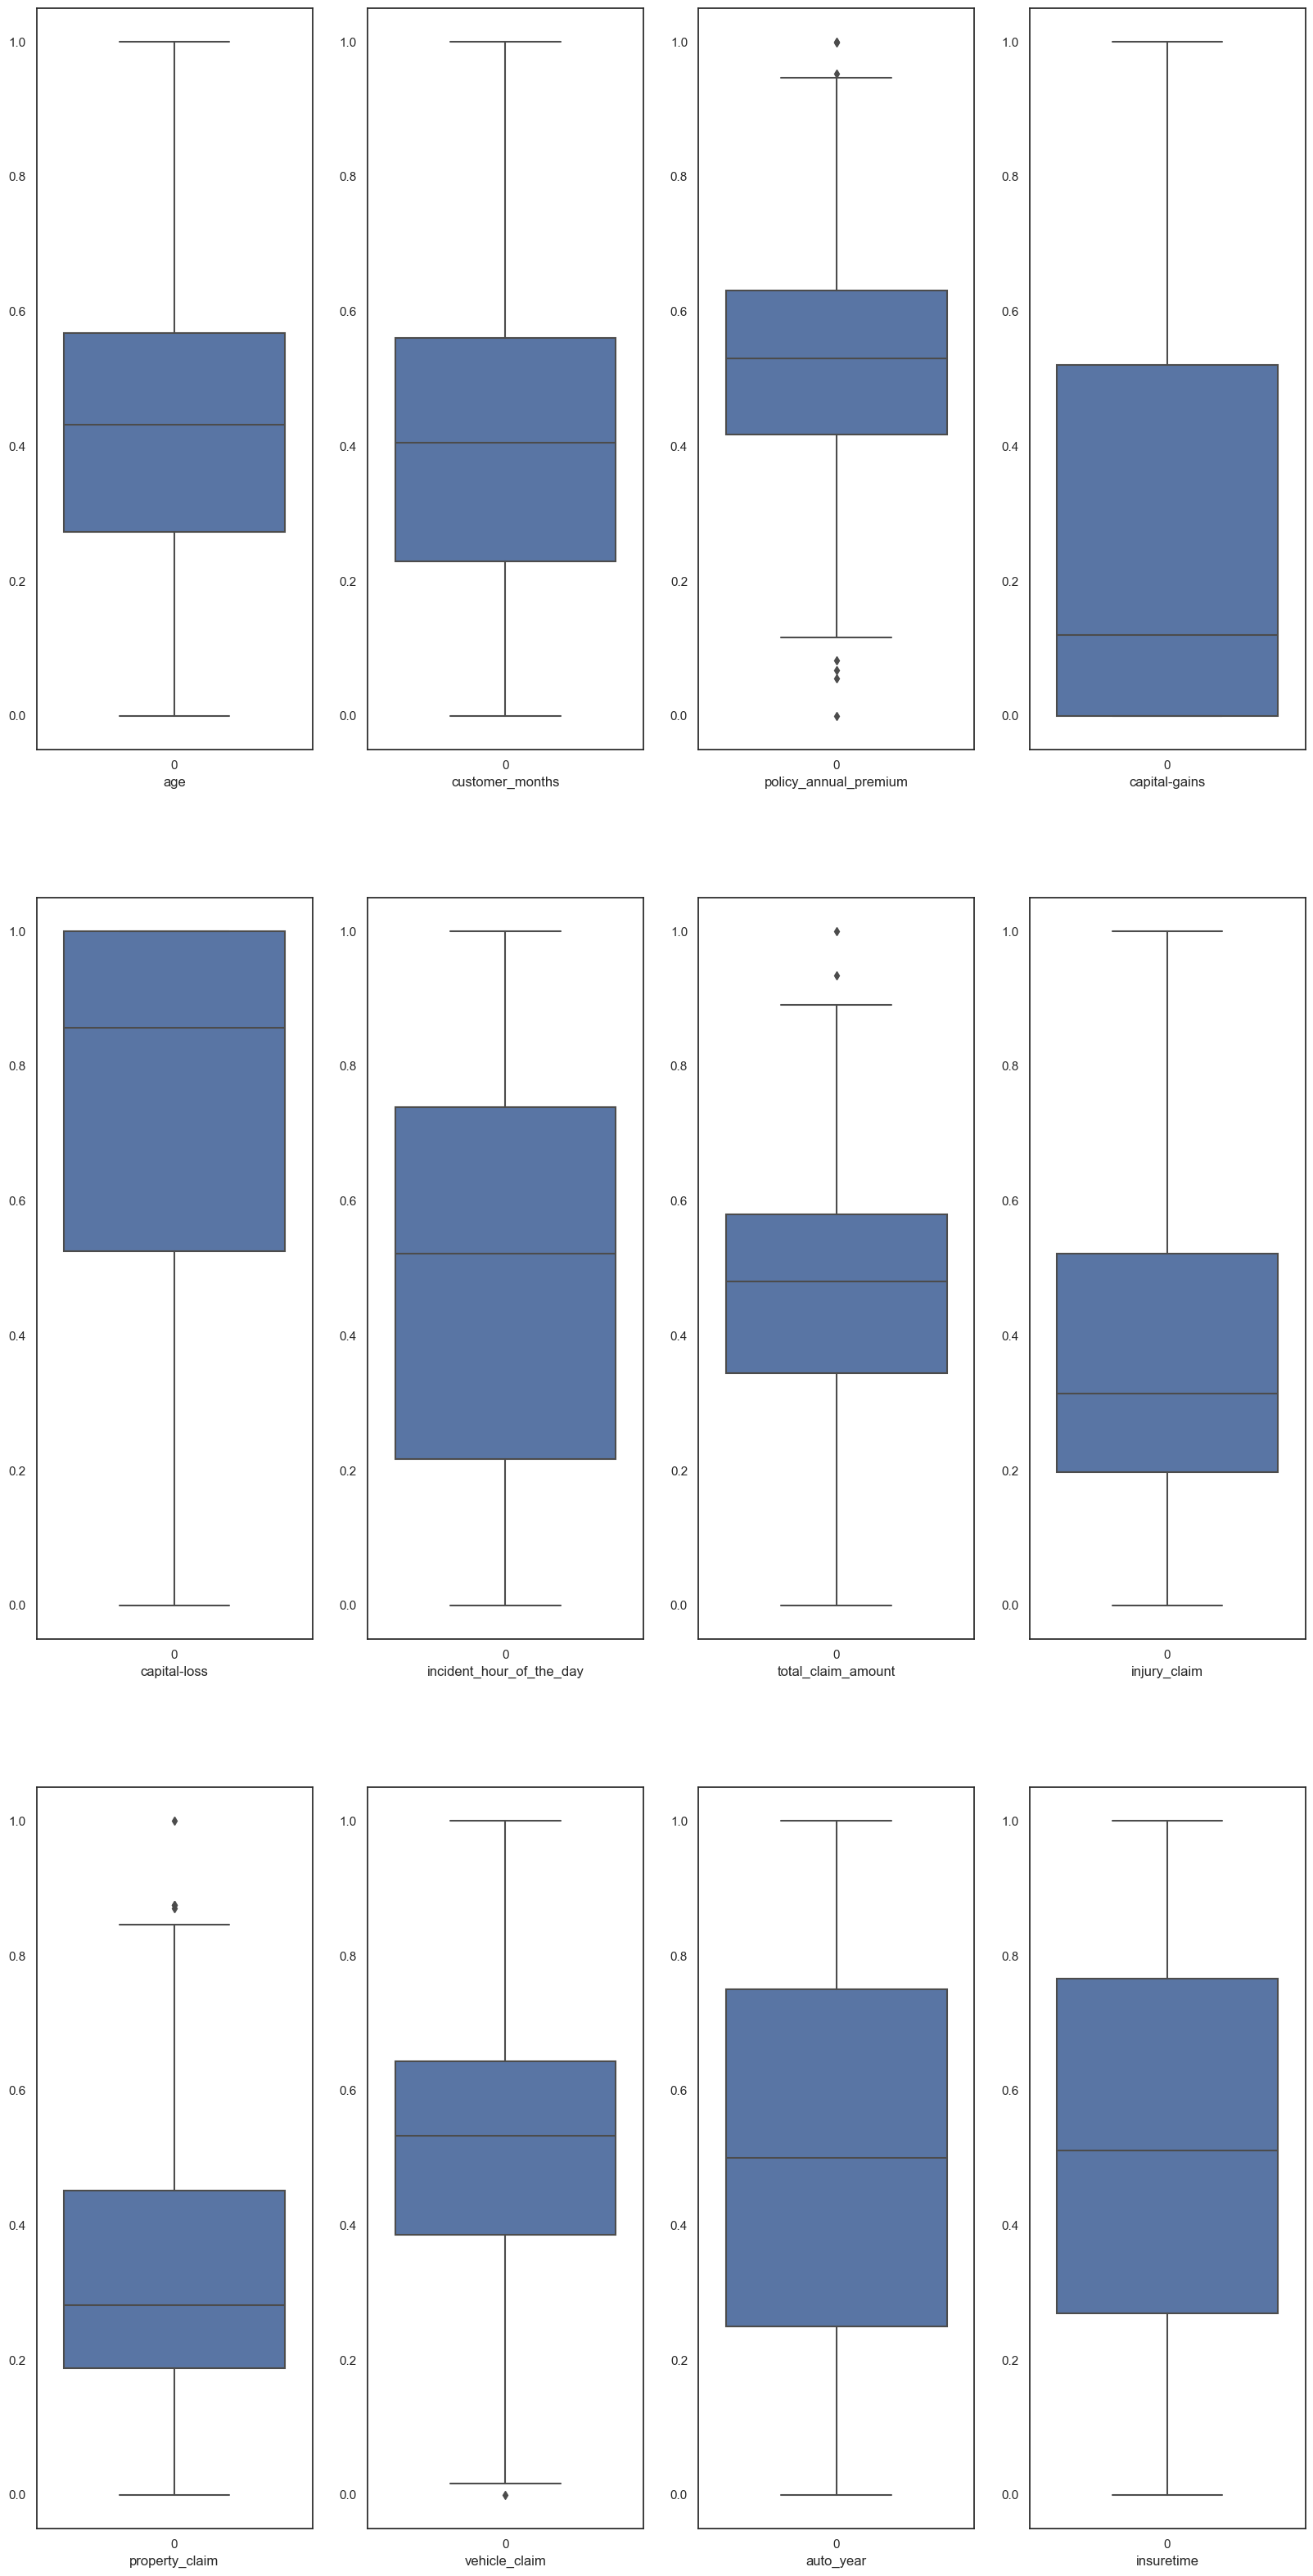

In [640]:
#绘制连续特征的箱线图
#找出存在异常值的数据
fig=plt.figure(figsize=(20,40))

i=1
for item in contious_fea:
    ax0=fig.add_subplot(3,4,i)
    sns.boxplot(DF[item],ax=ax0)
    plt.xlabel(item)
    i+=1

In [641]:
#通过3sigma法则去除异常值
#自定义一个异常值去除转化器
from sklearn.base import TransformerMixin
class deful_dele(TransformerMixin):
    def __init__(self,feature) -> None:
        super().__init__()
        self.fea=feature
        self.mean={}
        self.std={}
    
    def fit(self,DF):
        for item in self.fea:
            self.mean[item]=DF[item].mean()
            self.std[item]=DF[item].std()
        return self
    
    def transform(self,DF):
        for item in self.fea:
            means=self.mean[item]
            stds=self.std[item]
            bidx=(DF[item]<means-3*stds)|(means+3*stds<DF[item])
            idx=np.arange(len(DF[item]))[bidx]
            DF.drop(index=idx,inplace=True)
            DF.reset_index(drop=True,inplace=True)
        return DF

defulter=deful_dele(contious_fea)
defulter.fit(DF)
DF=defulter.transform(DF)

In [642]:
DF.head()

,age,customer_months,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_education_level,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud,insuretime,insured_sex_MALE,insured_occupation_pred_0,insured_occupation_pred_1,insured_hobbies_pred_0,insured_hobbies_pred_1,auto_make_pred_0,auto_make_pred_1,auto_model_pred_0,auto_model_pred_1
0,0.409091,0.379518,2,2,1000,0.661705,5,1,0.632858,1.000000,2,3,2,0,4,5,0.913043,1,0,0,3,0,0.454772,0.278450,0.241559,0.566270,0.75,0,0.057075,0,0.687500,0.312500,0.709677,0.290323,0.760000,0.240000,0.687500,0.312500
1,0.568182,0.469880,1,1,500,0.257124,3,2,0.321562,1.000000,0,3,1,3,4,6,0.173913,3,0,2,1,2,0.419521,0.248291,0.426508,0.475618,0.95,0,0.682726,1,0.743590,0.256410,0.718750,0.281250,0.687500,0.312500,0.416681,0.583319
2,0.318182,0.046185,1,2,1000,0.899186,2,5,0.000000,0.604345,2,3,2,4,2,3,0.000000,1,0,2,1,1,0.395874,0.205986,0.388334,0.428371,0.65,0,0.755100,0,0.767857,0.232143,0.761905,0.238095,0.864865,0.135135,0.923077,0.076923
3,0.522727,0.421687,0,2,500,0.913807,3,3,0.000000,0.546838,0,1,0,1,2,3,0.869565,3,2,2,2,2,0.570327,0.510022,0.250084,0.682326,0.60,1,0.250543,1,0.714286,0.285714,0.736842,0.263158,0.733333,0.266667,0.833333,0.166667
4,0.227273,0.162651,0,0,1000,0.253991,4,3,0.766067,0.324574,0,2,2,1,1,3,0.391304,3,2,2,1,2,0.494551,0.259422,0.432597,0.529244,0.55,0,0.522786,0,0.743590,0.256410,0.736842,0.263158,0.736842,0.263158,0.692309,0.307691


In [643]:
#离散特征中的policy_deductable
DF['policy_deductable']=DF['policy_deductable'].map({500:0,1000:1,2000:2})
Test['policy_deductable']=Test['policy_deductable'].map({500:0,1000:1,2000:2})

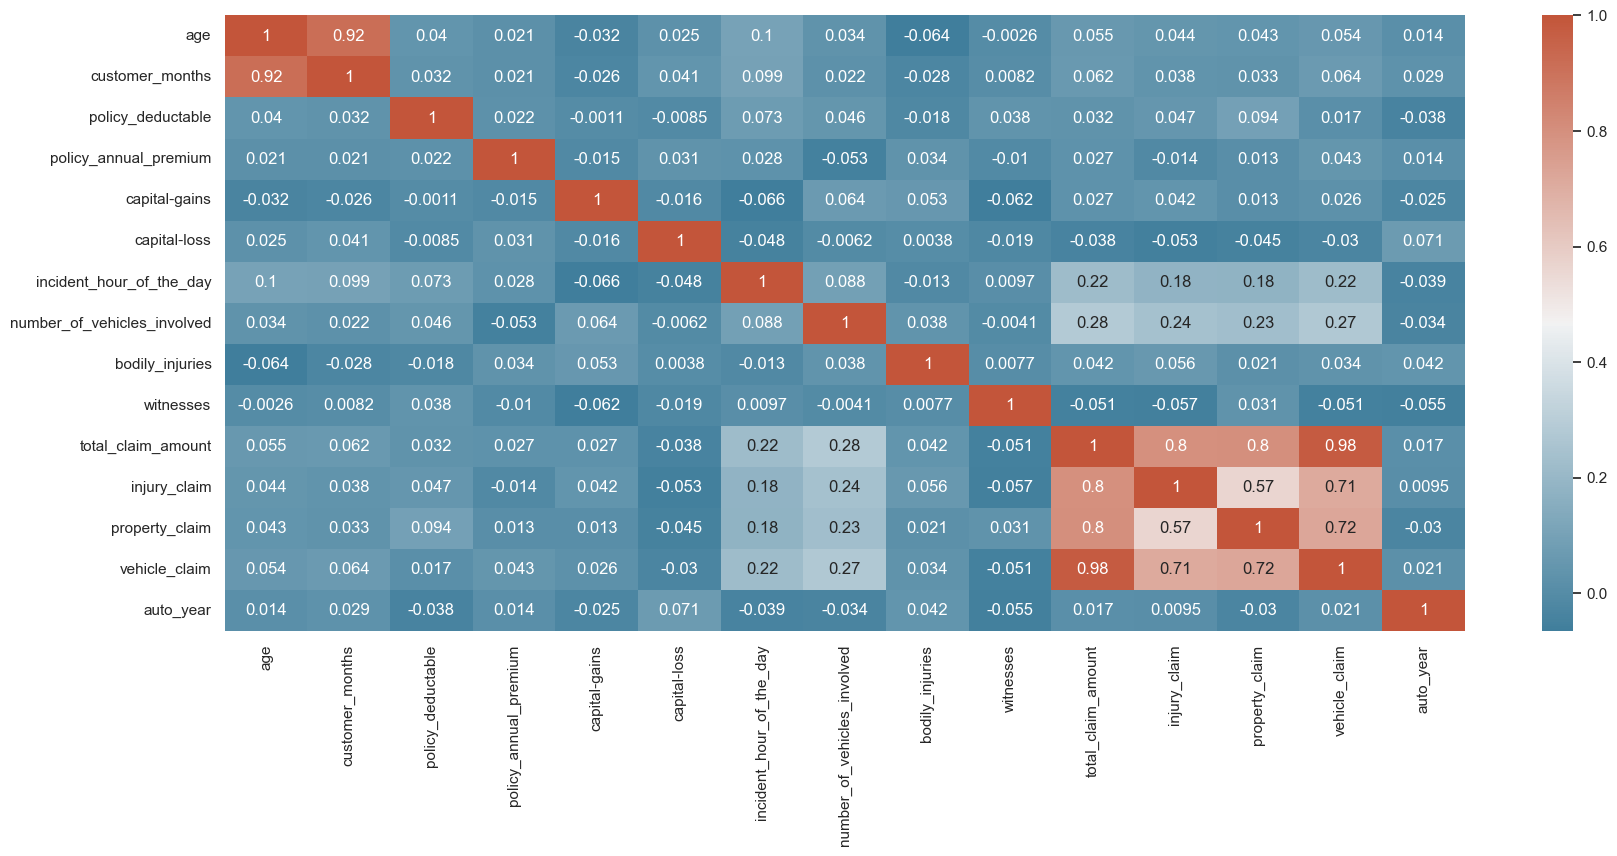

In [644]:
#查看定量特征之间的相关性，删去存在共线性的特征
cor=DF[num_feature].corr()
fig=plt.figure(figsize=(20,8))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cor,cmap=cmap,annot=True)
plt.show()

In [645]:
#查找遍历矩阵，查找共线性特征
corr_map={}
for item in num_feature:
    corr_map[item]=[]

cor_mat=np.mat(cor)
for i in range(len(cor_mat)):
    for j in range(i+1,len(cor_mat)):
        cor_value=np.abs(np.array(cor_mat[i])[0][j])
        if cor_value>0.7:
            val_1=num_feature[i]
            val_2=num_feature[j]
            corr_map[val_1].append(val_2)

drop_list=[]
for item in corr_map.keys():
    if corr_map[item]==[]:
        continue
    for i in range(len(corr_map[item])):
        drop_list.append(corr_map[item][i])
drop_list=list(set(drop_list))

DF.drop(columns=drop_list,inplace=True)
Test.drop(columns=drop_list,inplace=True)

In [646]:
DF.to_csv(path+'proceed_trian.csv')
Test.to_csv(path+'proceed_test.csv')

In [40]:
import pandas as pd
DF=pd.read_csv(path+'proceed_trian.csv',index_col=0)
labels=DF['fraud']
DF.drop(columns=['fraud'],inplace=True)

划分数据集，开始训练

In [41]:
X=np.array(DF)
Y=np.array(labels)
from sklearn.model_selection import train_test_split
trian_x,test_x,trian_y,test_y=train_test_split(X,Y,test_size=0.2)
from xgboost.sklearn import XGBClassifier
xgb_model=XGBClassifier(max_depth=10,n_estimators=300)
xgb_model.fit(trian_x,trian_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [42]:
y_pred=xgb_model.predict(test_x)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(recall_score(y_pred=y_pred,y_true=test_y))
print(precision_score(y_pred=y_pred,y_true=test_y))
print(accuracy_score(y_pred=y_pred,y_true=test_y))
importance=xgb_model.feature_importances_
importance

0.7142857142857143
0.6578947368421053
0.8357142857142857


array([0.02300346, 0.01290559, 0.01715201, 0.02256779, 0.02347427,
       0.03267898, 0.02070809, 0.0255172 , 0.02707704, 0.00875209,
       0.01947872, 0.22842966, 0.02663382, 0.02546406, 0.02498252,
       0.02599306, 0.01529708, 0.01247761, 0.02757272, 0.0291297 ,
       0.03603054, 0.02099496, 0.02555584, 0.02967045, 0.02276841,
       0.02166792, 0.        , 0.12539637, 0.        , 0.03305153,
       0.        , 0.03146391, 0.00410469], dtype=float32)

In [43]:
#删去贡献度为0的特征，减小模型的复杂度
features=DF.columns.tolist()
low_corr=[]
for i in range(len(importance)):
    if importance[i]==0:
        low_corr.append(features[i])
        DF.drop(columns=features[i],inplace=True)

In [18]:
X=np.array(DF)
Y=np.array(labels)
from sklearn.model_selection import train_test_split
trian_x,test_x,trian_y,test_y=train_test_split(X,Y,test_size=0.2)

from xgboost.sklearn import XGBClassifier
xgb_model=XGBClassifier(max_depth=10,n_estimators=300)
xgb_model.fit(trian_x,trian_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [16]:
y_pred=xgb_model.predict(test_x)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print(recall_score(y_pred=y_pred,y_true=test_y))
print(precision_score(y_pred=y_pred,y_true=test_y))
print(accuracy_score(y_pred=y_pred,y_true=test_y))
importance=xgb_model.feature_importances_
importance

0.5
0.75
0.8


array([0.02782765, 0.01761745, 0.02256797, 0.02260685, 0.024335  ,
       0.02048595, 0.03474241, 0.02474998, 0.02727191, 0.00869239,
       0.01962079, 0.20255722, 0.02326307, 0.02884265, 0.03083919,
       0.02097124, 0.02569921, 0.02539376, 0.03023625, 0.02776141,
       0.02904013, 0.02427387, 0.02417842, 0.03115493, 0.00958764,
       0.02183368, 0.10758378, 0.03700144, 0.02695868, 0.02230513],
      dtype=float32)

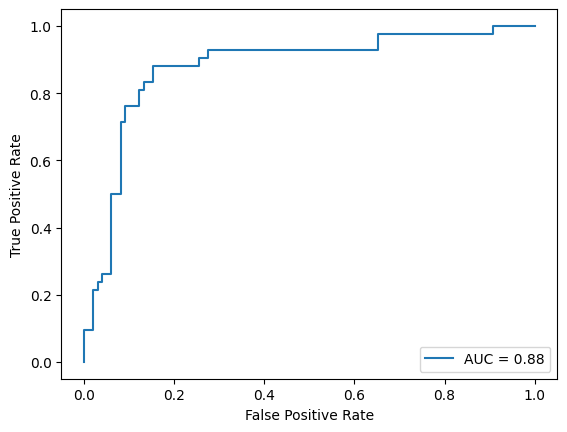

In [17]:
y_pred_prob=xgb_model.predict_proba(test_x)[:,1]
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thres=roc_curve(y_true=test_y,y_score=y_pred_prob,pos_label=1)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(test_y,y_pred_prob)).plot()

在测试集上应用模型

In [669]:
Test=pd.read_csv(path+'proceed_test.csv',index_col=0)
Test.drop(columns=low_corr,inplace=True)
submit=pd.read_csv(path+'submission.csv')
proba=xgb_model.predict_proba(Test)[:,-1]
submit['fraud']=proba
submit.to_csv(path+'submission.csv',index=False)